In [1]:
import pickle
import numpy as np
import math
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = 6, 3

In [2]:
with open('mlp_Drugs_SP_Experiments.pkl', 'rb') as handle:
    GF_Experiments = pickle.load(handle)


In [3]:
GF_Experiments_summary = [GF_Experiments['filter_1'], GF_Experiments['filter_2'],GF_Experiments['filter_3'],GF_Experiments['filter_4'],GF_Experiments['filter_5'],
                           GF_Experiments['filter_6'],GF_Experiments['filter_7'],GF_Experiments['filter_8'],GF_Experiments['filter_9'],GF_Experiments['filter_10']]

true_sp_summary = [GF_Experiments['filter_1']['true_sp'], GF_Experiments['filter_2']['true_sp'],GF_Experiments['filter_3']['true_sp'],GF_Experiments['filter_4']['true_sp'],GF_Experiments['filter_5']['true_sp'],
                           GF_Experiments['filter_6']['true_sp'],GF_Experiments['filter_7']['true_sp'],GF_Experiments['filter_8']['true_sp'],GF_Experiments['filter_9']['true_sp'],GF_Experiments['filter_10']['true_sp']]


In [4]:
max_value = max(true_sp_summary)
max_index = true_sp_summary.index(max_value)
max_index

1

In [5]:
#efficient_afa
Exp_efficient_afa = GF_Experiments['filter_2']['afa']['experiments']
AFA_Mean_GF =[Exp_efficient_afa[Exp_efficient_afa["Experiment"] == i+1]["error"].mean() for i in range(10)]
AFA_std_GF = [Exp_efficient_afa[Exp_efficient_afa["Experiment"] == i+1]["error"].std() for i in range(10)]

AFA_lower_CI_GF = [AFA_Mean_GF[i] - 1.96* AFA_std_GF[i]/math.sqrt(100*(i+1)) for i in range(10)]
AFA_upper_CI_GF = [AFA_Mean_GF[i] + 1.96* AFA_std_GF[i]/math.sqrt(100*(i+1)) for i in range(10)]

In [6]:
# baseline 1: iid
Exp_iid = GF_Experiments['filter_2']['iid']['experiments']

IID_Mean_GF = [Exp_iid[Exp_iid["Experiment"] == i+1]["error"].mean() for i in range(10)]
IID_std_GF = [Exp_iid[Exp_iid["Experiment"] == i+1]["error"].std() for i in range(10)]

IID_lower_CI_GF = [IID_Mean_GF[i] - 1.96* IID_std_GF[i]/math.sqrt(100*(i+1)) for i in range(10)]
IID_upper_CI_GF = [IID_Mean_GF[i] + 1.96* IID_std_GF[i]/math.sqrt(100*(i+1)) for i in range(10)]

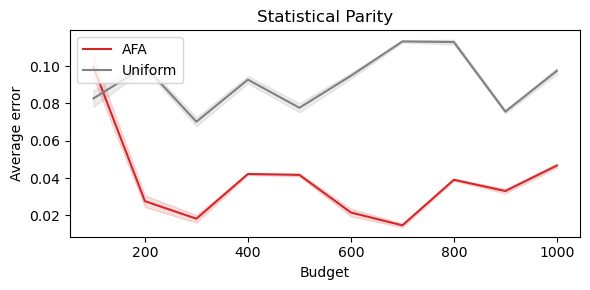

In [7]:
budgets_zhang = [500, 600, 800,900, 1000]
budgets = [100, 200, 300, 400, 500,600,700,800,900,1000]


plt.plot(budgets, AFA_Mean_GF, color = 'C3', label="AFA")
plt.fill_between(budgets,AFA_lower_CI_GF, AFA_upper_CI_GF, color = 'C3', alpha =.15)

plt.plot(budgets, IID_Mean_GF, color = 'grey', label="Uniform")
plt.fill_between(budgets,IID_lower_CI_GF, IID_upper_CI_GF, color = 'grey', alpha =.15)


plt.legend(loc = "upper left")
plt.ylabel("Average error")
plt.xlabel("Budget")
plt.tight_layout()
plt.title('Statistical Parity')
plt.tight_layout()
plt.savefig("GF_multiclass.pdf")
plt.show()

/tmp/ipykernel_663463/2806180489.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('tab20')  # You can choose other colormaps like 'viridis', 'plasma', etc.


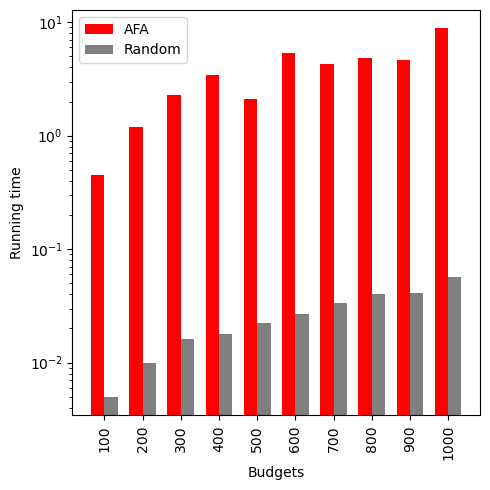

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm


AFA_computation = GF_Experiments['filter_2']['afa']['computation_time_afa']
IID_computation = GF_Experiments['filter_2']['iid']['computation_sp_iid']



# Convert categories to indices
categories = np.arange(len(budgets))
values1 = AFA_computation
values2 = IID_computation

# Get a colormap
colormap = cm.get_cmap('tab20')  # You can choose other colormaps like 'viridis', 'plasma', etc.

# Get colormaps
keys = [100, 200, 300, 400, 500,600,700,800,900,1000]

colors1 = 'red'
colors2 = 'grey'

# X locations for the groups
x = np.arange(len(categories))

# Width of the bars
width = 0.35

fig, ax = plt.subplots(figsize=(5, 5))

# Plotting the bars
bars1 = ax.bar(x - width/2, values1, width, color=colors1, label='AFA')
bars2 = ax.bar(x + width/2, values2, width, color=colors2, label='Random')

# Adding labels and title
plt.xlabel('Budgets', fontsize=10)
plt.ylabel('Running time', fontsize=10)
#plt.title('Statistical parity running time')
plt.xticks(x, keys, fontsize=10, rotation=90)
plt.yticks(fontsize=10) 
plt.yscale('log')
plt.tight_layout()
ax.legend()
plt.savefig("SP_drugs_runtime.pdf")
plt.show()

In [20]:
Exp_efficient_afa

,Iteration,Experiment,Estimated_Group_Fairness,error
0,1,1,0.224275,0.069586
1,1,2,0.321461,0.027600
2,1,3,0.254179,0.039682
3,1,4,0.246703,0.047158
4,1,5,0.248198,0.045663
5,1,6,0.244211,0.049650
6,1,7,0.286218,0.007643
7,1,8,0.257917,0.035945
8,1,9,0.245872,0.047989
9,1,10,0.225771,0.068091


In [21]:
Exp_iid

,Iteration,Experiment,Estimated_Group_Fairness,error
0,1,1,0.237624,0.056237
1,1,2,0.194030,0.099831
2,1,3,0.199336,0.094526
3,1,4,0.219451,0.074410
4,1,5,0.247505,0.046356
5,1,6,0.219634,0.074227
6,1,7,0.171184,0.122677
7,1,8,0.176030,0.117831
8,1,9,0.231964,0.061897
9,1,10,0.225774,0.068087
